# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns #for background style for plots
from matplotlib.pyplot import figure #plot size
import matplotlib.style #Setting the theme of your plots
import plotly.graph_objects as go
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',100)

# Collection of data

In [ ]:
##connect to the MngoDb 
import pymongo

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb=myclient["telecom"]
mycol=mydb["telecom"]

#data reading from mongoDB
import pandas as pd
data=pd.DataFrame(mycol.find())
data.head()

In [3]:
data=pd.read_csv("telecom.csv")
print(data.shape)
data.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# EDA & Prepocessing

In [119]:
#Checking whether data is balanced or imbalanced
yes=len(data[data['Churn']=='Yes'])
no=len(data[data['Churn']=='No'])
tot=len(data)

yes=(yes/tot)*100
no=(no/tot)*100

print('yes= ',yes,'%','\n no= ',no,'%')

yes=  26.536987079369588 % 
 no=  73.4630129206304 %


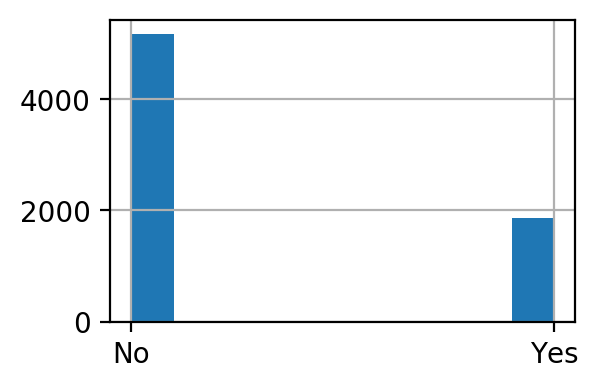

In [120]:
figure(num=None, figsize=(3, 2), dpi=200)
data['Churn'].hist()

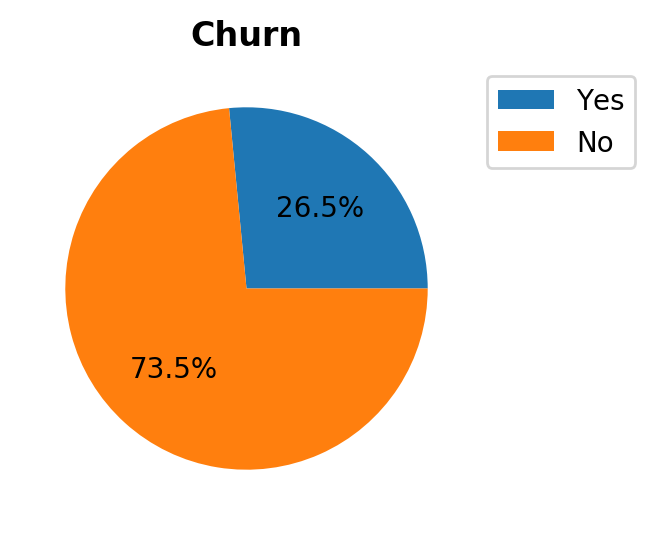

In [121]:
#Pie Chart
#Calculating Sales Percentage
Churn_Perc=[yes,no]
figure(num=None, figsize=(5, 3), dpi=200)
plt.pie(Churn_Perc,autopct='%1.1f%%')
plt.title("Churn",weight="bold")
labels=['Yes','No']
plt.legend(labels,bbox_to_anchor=(1, 1))
plt.show()


we can see that number of churned customers too less than the number of unchurned customers. It is unbalanced data

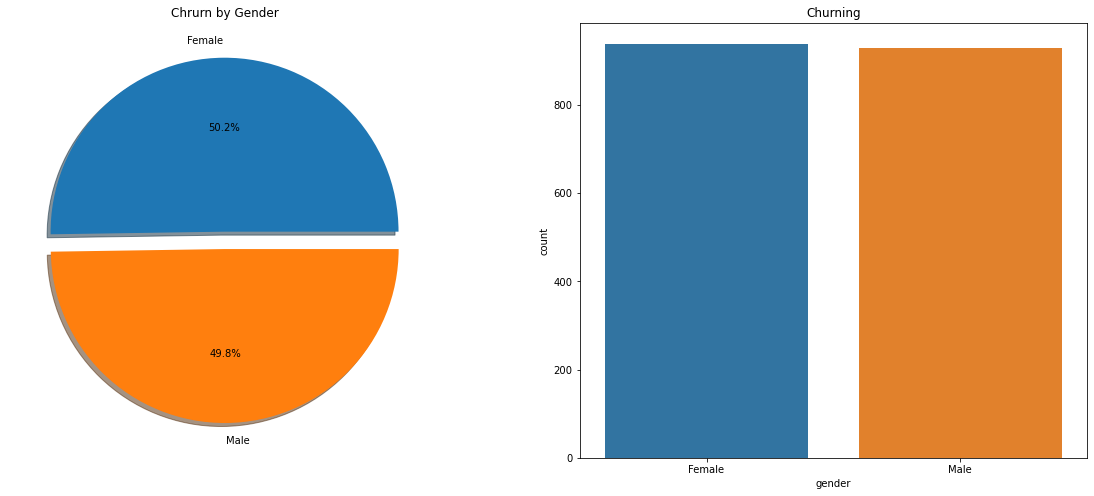

In [11]:
positive = data[(data['Churn'] == "Yes")]
f,ax=plt.subplots(1,2,figsize=(20,8))
positive['gender'].value_counts().plot.pie(explode=[0.05 ,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Chrurn by Gender')
ax[0].set_ylabel('')
sns.countplot('gender',order = positive['gender'].value_counts().index, data=positive,ax=ax[1])
ax[1].set_title('Churning')
plt.show()

Here we can see that both male and female equally churning

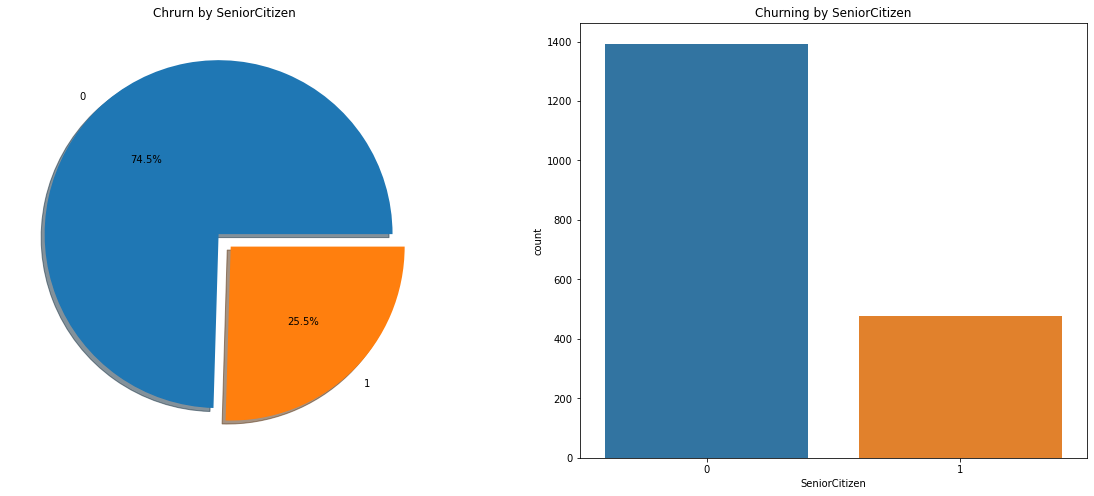

In [12]:
positive = data[(data['Churn'] == "Yes")]
f,ax=plt.subplots(1,2,figsize=(20,8))
positive['SeniorCitizen'].value_counts().plot.pie(explode=[0.05 ,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Chrurn by SeniorCitizen')
ax[0].set_ylabel('')
sns.countplot('SeniorCitizen',order = positive['SeniorCitizen'].value_counts().index, data=positive,ax=ax[1])
ax[1].set_title('Churning by SeniorCitizen')
plt.show()

We can see that senior citizens churning less

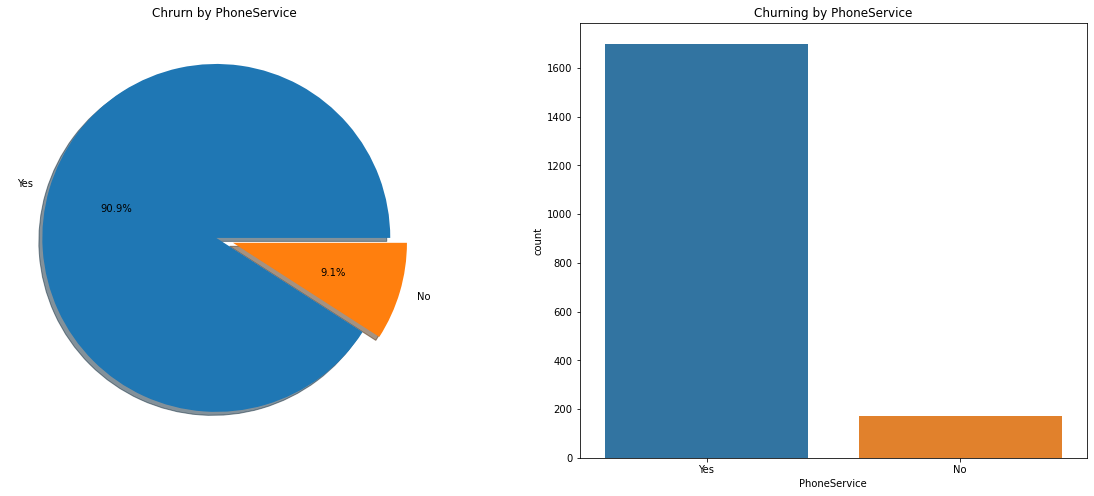

In [13]:
positive = data[(data['Churn'] == "Yes")]
f,ax=plt.subplots(1,2,figsize=(20,8))
positive['PhoneService'].value_counts().plot.pie(explode=[0.05 ,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Chrurn by PhoneService')
ax[0].set_ylabel('')
sns.countplot('PhoneService',order = positive['PhoneService'].value_counts().index, data=positive,ax=ax[1])
ax[1].set_title('Churning by PhoneService')
plt.show()

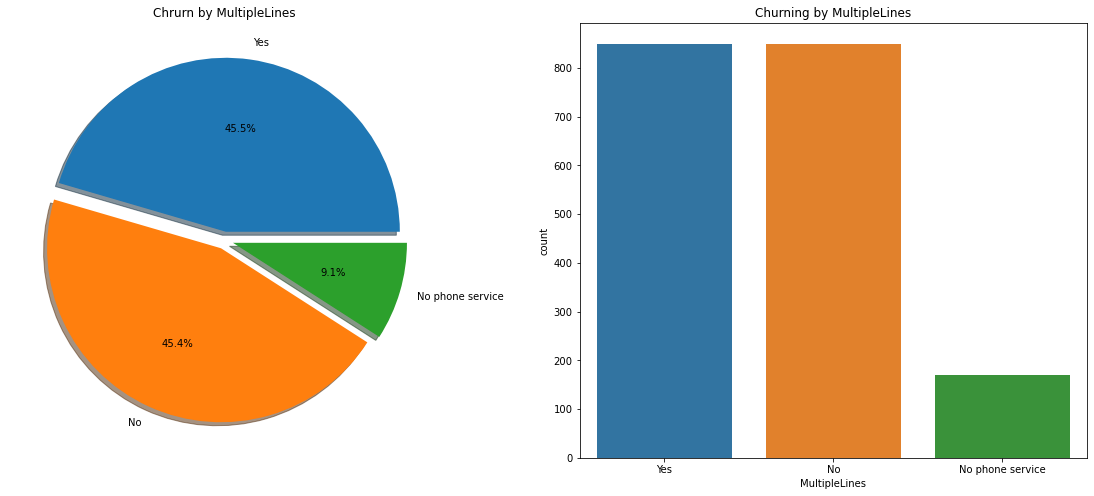

In [17]:
positive = data[(data['Churn'] == "Yes")]
f,ax=plt.subplots(1,2,figsize=(20,8))
positive['MultipleLines'].value_counts().plot.pie(explode=[0.05,0.05 ,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Chrurn by MultipleLines')
ax[0].set_ylabel('')
sns.countplot('MultipleLines',order = positive['MultipleLines'].value_counts().index, data=positive,ax=ax[1])
ax[1].set_title('Churning by MultipleLines')
plt.show()

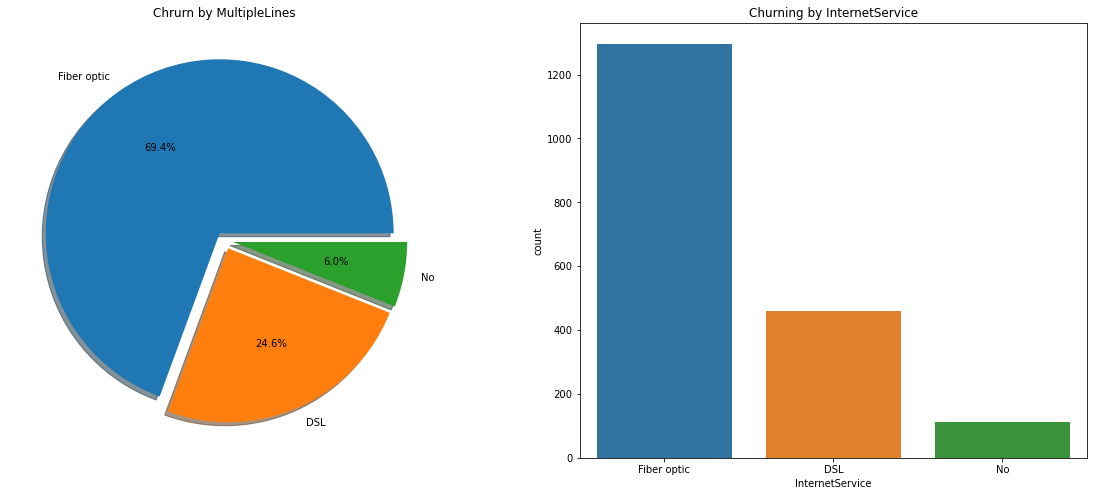

In [18]:
positive = data[(data['Churn'] == "Yes")]
f,ax=plt.subplots(1,2,figsize=(20,8))
positive['InternetService'].value_counts().plot.pie(explode=[0.05,0.05 ,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Chrurn by MultipleLines')
ax[0].set_ylabel('')
sns.countplot('InternetService',order = positive['InternetService'].value_counts().index, data=positive,ax=ax[1])
ax[1].set_title('Churning by InternetService')
plt.show()

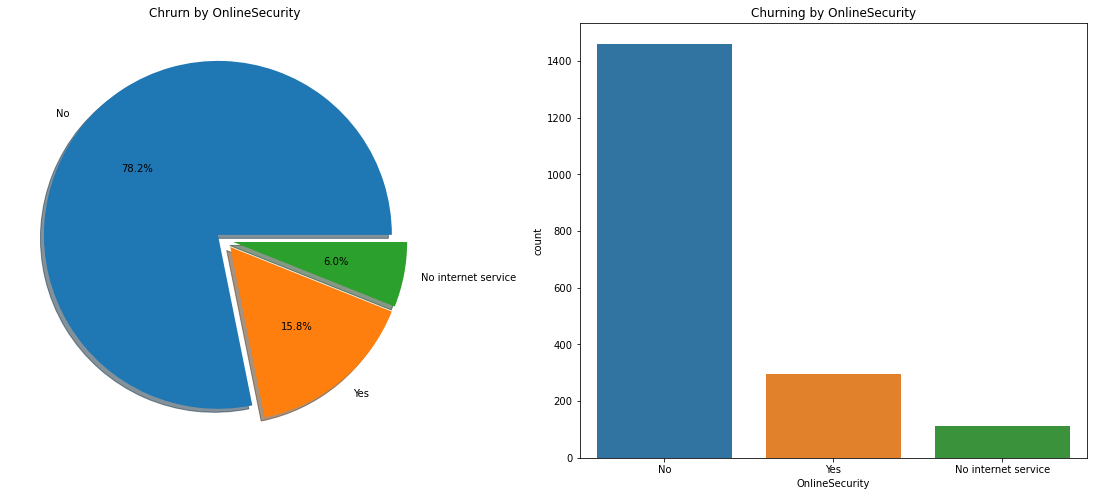

In [20]:
positive = data[(data['Churn'] == "Yes")]
f,ax=plt.subplots(1,2,figsize=(20,8))
positive['OnlineSecurity'].value_counts().plot.pie(explode=[0.05,0.05 ,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Chrurn by OnlineSecurity')
ax[0].set_ylabel('')
sns.countplot('OnlineSecurity',order = positive['OnlineSecurity'].value_counts().index, data=positive,ax=ax[1])
ax[1].set_title('Churning by OnlineSecurity')
plt.show()

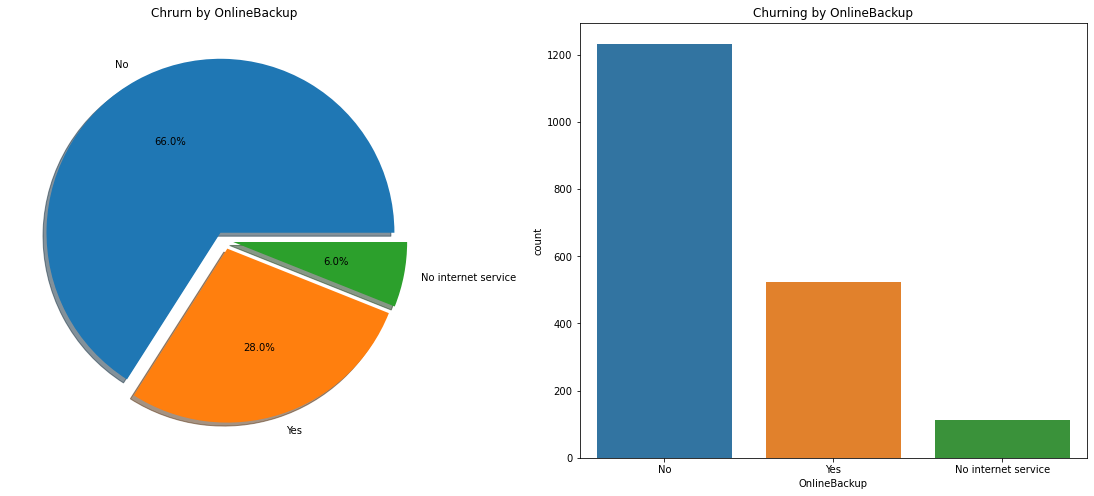

In [21]:
positive = data[(data['Churn'] == "Yes")]
f,ax=plt.subplots(1,2,figsize=(20,8))
positive['OnlineBackup'].value_counts().plot.pie(explode=[0.05,0.05 ,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Chrurn by OnlineBackup')
ax[0].set_ylabel('')
sns.countplot('OnlineBackup',order = positive['OnlineBackup'].value_counts().index, data=positive,ax=ax[1])
ax[1].set_title('Churning by OnlineBackup')
plt.show()

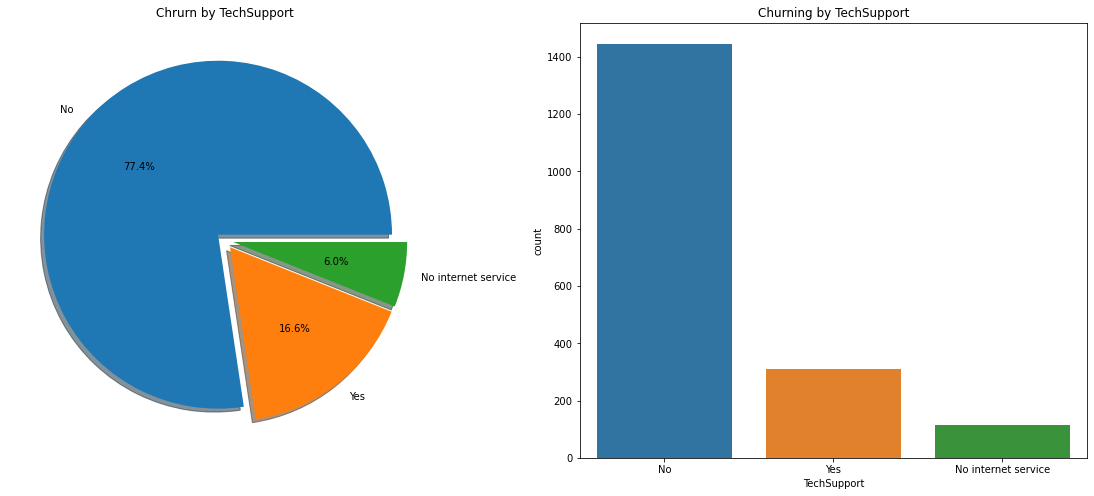

In [22]:
positive = data[(data['Churn'] == "Yes")]
f,ax=plt.subplots(1,2,figsize=(20,8))
positive['TechSupport'].value_counts().plot.pie(explode=[0.05,0.05 ,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Chrurn by TechSupport')
ax[0].set_ylabel('')
sns.countplot('TechSupport',order = positive['TechSupport'].value_counts().index, data=positive,ax=ax[1])
ax[1].set_title('Churning by TechSupport')
plt.show()

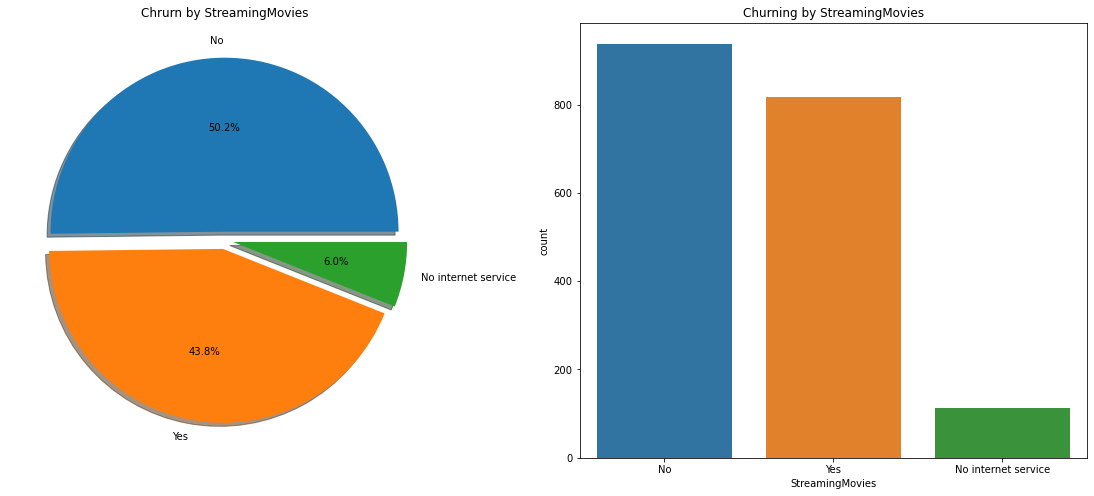

In [23]:
positive = data[(data['Churn'] == "Yes")]
f,ax=plt.subplots(1,2,figsize=(20,8))
positive['StreamingMovies'].value_counts().plot.pie(explode=[0.05,0.05 ,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Chrurn by StreamingMovies')
ax[0].set_ylabel('')
sns.countplot('StreamingMovies',order = positive['StreamingMovies'].value_counts().index, data=positive,ax=ax[1])
ax[1].set_title('Churning by StreamingMovies')
plt.show()

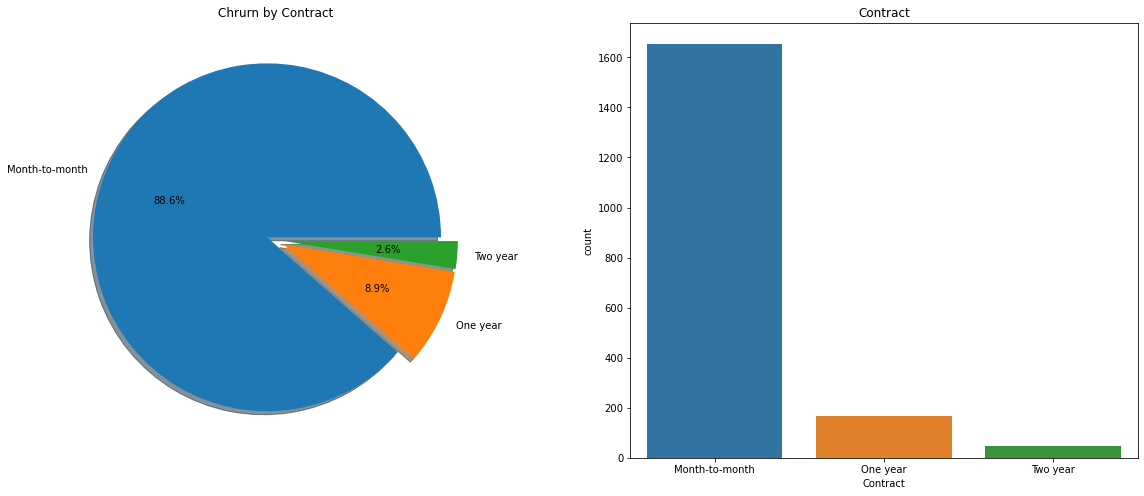

In [24]:
positive = data[(data['Churn'] == "Yes")]
f,ax=plt.subplots(1,2,figsize=(20,8))
positive['Contract'].value_counts().plot.pie(explode=[0.05,0.05 ,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Chrurn by Contract')
ax[0].set_ylabel('')
sns.countplot('Contract',order = positive['Contract'].value_counts().index, data=positive,ax=ax[1])
ax[1].set_title('Contract')
plt.show()

In [14]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

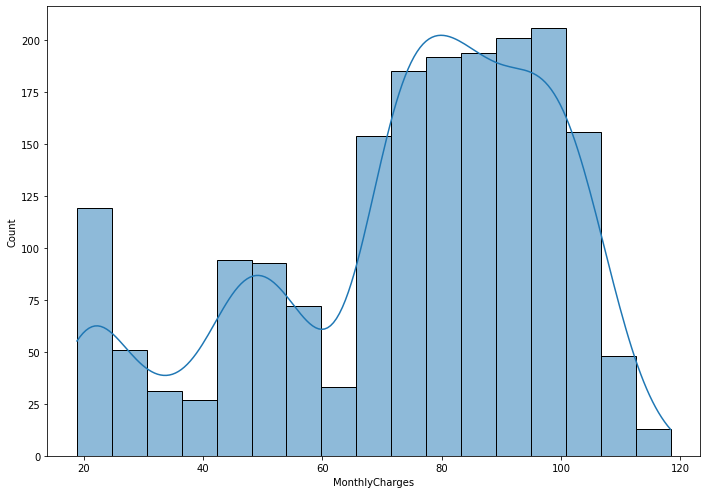

In [29]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(data= positive, x="MonthlyCharges", kde=True)

Here we can see that customers who has bill near to 100 churning more

In [123]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#Null value treatment
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [31]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [32]:
#Converting TotalCharges into float
#Replacing spaces with null values in total charges column
data['TotalCharges'] = data["TotalCharges"].replace(" ",np.nan)
data.TotalCharges=pd.to_numeric(data.TotalCharges)
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [33]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [34]:
#Replace null with mean
data.fillna(data.TotalCharges.mean(),inplace=True)

In [35]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

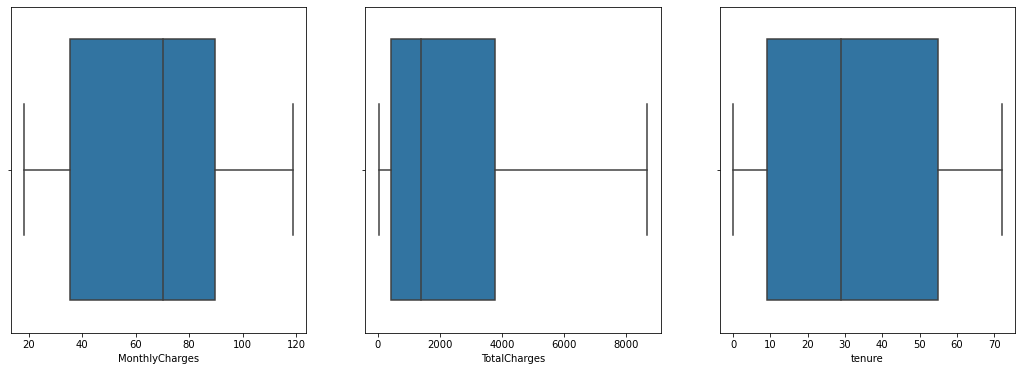

In [36]:
#Outliers
import seaborn as sns

fig, axs = plt.subplots(1,3, figsize = (18,6))

sns.boxplot(data.MonthlyCharges, ax = axs[0])
sns.boxplot(data.TotalCharges, ax = axs[1])
sns.boxplot(data.tenure, ax = axs[2])
plt.tight_layout
plt.show()


No outliers found

In [16]:
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
#verifying categorical data
cat_cols=data.select_dtypes(exclude=['int64', 'float']).columns
cat_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [38]:
#verifying categorical data

for i in cat_cols:
    if i!='customerID':
      print(i,'=',data[i].unique())


gender = ['Female' 'Male']
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
PhoneService = ['No' 'Yes']
MultipleLines = ['No phone service' 'No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes' 'No internet service']
OnlineBackup = ['Yes' 'No' 'No internet service']
DeviceProtection = ['No' 'Yes' 'No internet service']
TechSupport = ['No' 'Yes' 'No internet service']
StreamingTV = ['No' 'Yes' 'No internet service']
StreamingMovies = ['No' 'Yes' 'No internet service']
Contract = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling = ['Yes' 'No']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn = ['No' 'Yes']


In [39]:
#replace 'No internet service' to No for the following columns
data  = data.replace({'No internet service' : 'No'})
data  = data.replace({'No phone service' : 'No'})
#verifying categorical data
for i in cat_cols:
    if i!='customerID':
      print(i,'=',data[i].unique())

gender = ['Female' 'Male']
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
PhoneService = ['No' 'Yes']
MultipleLines = ['No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes']
OnlineBackup = ['Yes' 'No']
DeviceProtection = ['No' 'Yes']
TechSupport = ['No' 'Yes']
StreamingTV = ['No' 'Yes']
StreamingMovies = ['No' 'Yes']
Contract = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling = ['Yes' 'No']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn = ['No' 'Yes']


In [40]:
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
bin_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [41]:
#Function for dictonary to store coding info about varaibles
info={}
def code_map(le,name):
    global info
    job_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    info[name]=job_name_mapping
    print(name,' :varaiable successfully coded')

In [42]:
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
for i in bin_cols:
    data[i]=le.fit_transform(data[i])
    code_map(le,i)
data.head()

gender  :varaiable successfully coded
SeniorCitizen  :varaiable successfully coded
Partner  :varaiable successfully coded
Dependents  :varaiable successfully coded
PhoneService  :varaiable successfully coded
MultipleLines  :varaiable successfully coded
OnlineSecurity  :varaiable successfully coded
OnlineBackup  :varaiable successfully coded
DeviceProtection  :varaiable successfully coded
TechSupport  :varaiable successfully coded
StreamingTV  :varaiable successfully coded
StreamingMovies  :varaiable successfully coded
PaperlessBilling  :varaiable successfully coded
Churn  :varaiable successfully coded


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [43]:
info

{'gender': {'Female': 0, 'Male': 1},
 'SeniorCitizen': {0: 0, 1: 1},
 'Partner': {'No': 0, 'Yes': 1},
 'Dependents': {'No': 0, 'Yes': 1},
 'PhoneService': {'No': 0, 'Yes': 1},
 'MultipleLines': {'No': 0, 'Yes': 1},
 'OnlineSecurity': {'No': 0, 'Yes': 1},
 'OnlineBackup': {'No': 0, 'Yes': 1},
 'DeviceProtection': {'No': 0, 'Yes': 1},
 'TechSupport': {'No': 0, 'Yes': 1},
 'StreamingTV': {'No': 0, 'Yes': 1},
 'StreamingMovies': {'No': 0, 'Yes': 1},
 'PaperlessBilling': {'No': 0, 'Yes': 1},
 'Churn': {'No': 0, 'Yes': 1}}

In [44]:
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols and i!='customerID']
multi_cols

['InternetService', 'Contract', 'PaymentMethod']

Now encode this features using one hot encoding

In [45]:
from sklearn.preprocessing import OneHotEncoder

data1 = pd.get_dummies(data ,columns = multi_cols )

data1.shape

(7043, 28)

In [46]:
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

Now lets remove customerID feature

In [47]:
data1=data1.drop('customerID',axis=1)
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [48]:
#Shift target variable to end
mid = data1['Churn']
data1.drop('Churn', axis=1,inplace = True)
data1['Churn']=mid
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,1,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,1,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,1,0,0,0,0,0,1,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,0,1,0,1,0,0,0,0,1,0,1


In [160]:
#Correlation
cr=data1.corr(method='pearson')
corr_variables=[]

for i in cr.columns:
    for j in cr.columns:
        if i!=j:
            if cr[i][j]>0.8:
                corr_variables.append([i,j])
          
corr_variables                

[['tenure', 'TotalCharges'], ['TotalCharges', 'tenure']]

Here we can see that tenure , total charges  are dependent .So remove one column

In [49]:
data1=data1.drop('TotalCharges',axis=1)

In [51]:
#data Splitting
X=data1.iloc[:,0:-1]
y=data1.iloc[:,-1]

# Component PCA 

In [97]:
from sklearn.decomposition import TruncatedSVD

pcaed = TruncatedSVD(n_components=2).fit_transform(X)
pcaed = pd.concat([pd.DataFrame(pcaed).reset_index(drop=True), data["Churn"].reset_index(drop=True)], axis=1)
pcaed.head()

,0,1,Churn
0,27.195711,-12.408000,0
1,66.146473,5.088456,0
2,49.134595,-22.194798,1
3,57.926112,21.463622,0
4,64.206764,-29.720542,1


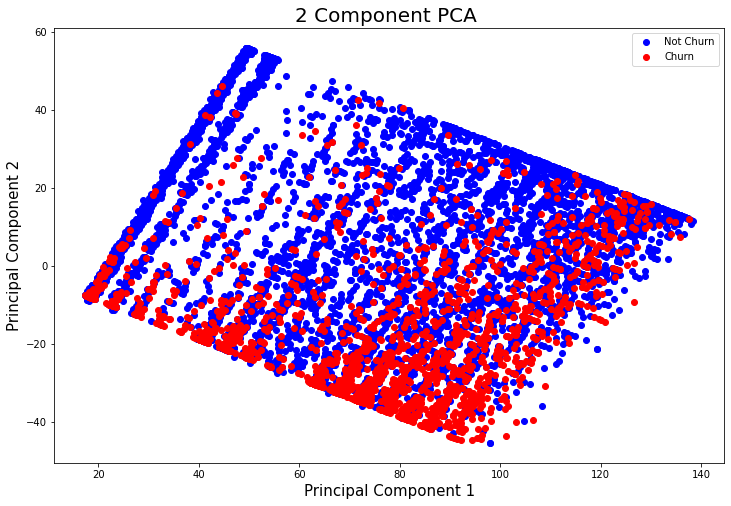

In [98]:
pctrue=pcaed[pcaed["Churn"]==0]
pcfake=pcaed[pcaed["Churn"]==1]
plt.figure(figsize = (12,8))
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 Component PCA ', fontsize = 20)
plt.scatter(pctrue[0], pctrue[1], color="blue")
plt.scatter(pcfake[0], pcfake[1], color="red")
plt.legend(["Not Churn", "Churn"])

We can see that they are very similar and that there is no clear distinction between the two.

In [52]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
norm_data = MinMaxScaler().fit_transform(X)
norm_data=pd.DataFrame(norm_data,columns=X.columns)
norm_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.115423,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.385075,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.354229,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.239303,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.521891,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

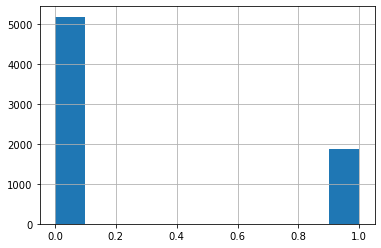

In [53]:
#Data Balance
y.hist()

We can see that data is imbalanced. Lets over sampling it using smote technique

In [56]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state = 0)
X2, y2 = os.fit_resample(X, y)

In [58]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

SS= StandardScaler()
X_norm = SS.fit_transform(X2)

[0.02730583 0.01882961 0.02817602 0.03343537 0.13998018 0.00843463
 0.02136274 0.04816842 0.02571086 0.02167548 0.03675543 0.01865523
 0.01962599 0.02648581 0.14662482 0.0095859  0.05027749 0.02139651
 0.08919579 0.04402211 0.05979513 0.02795513 0.02897795 0.02517369
 0.02239389]


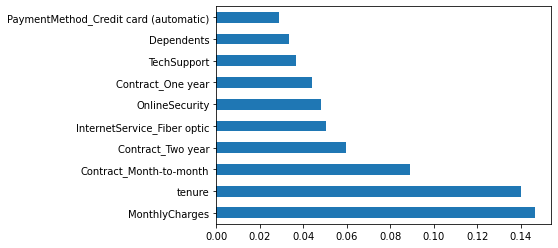

In [94]:
#Feature importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_norm,y2)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_ , index = X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [95]:
feat_importances.nlargest(10).keys().to_list()

['MonthlyCharges',
 'tenure',
 'Contract_Month-to-month',
 'Contract_Two year',
 'InternetService_Fiber optic',
 'OnlineSecurity',
 'Contract_One year',
 'TechSupport',
 'Dependents',
 'PaymentMethod_Credit card (automatic)']

In [88]:
X_norm_df = pd.DataFrame( X_norm , columns = X.columns)

In [96]:
X_final = X_norm_df[feat_importances.nlargest(10).keys().to_list()]
X_final.head()

,MonthlyCharges,tenure,Contract_Month-to-month,Contract_Two year,InternetService_Fiber optic,OnlineSecurity,Contract_One year,TechSupport,Dependents,PaymentMethod_Credit card (automatic)
0,-1.315958,-1.108403,0.742893,-0.446799,-1.040035,-0.513766,-0.419893,-0.524117,-0.531151,-0.431297
1,-0.376526,0.262484,-1.346089,-0.446799,-1.040035,1.946413,2.381559,-0.524117,-0.531151,-0.431297
2,-0.483988,-1.066861,0.742893,-0.446799,-1.040035,1.946413,-0.419893,-0.524117,-0.531151,-0.431297
3,-0.884374,0.719446,-1.346089,-0.446799,-1.040035,1.946413,2.381559,1.907972,-0.531151,-0.431297
4,0.100124,-1.066861,0.742893,-0.446799,0.961506,-0.513766,-0.419893,-0.524117,-0.531151,-0.431297


In [90]:
#Splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_final , y2,test_size=0.33, random_state=42)

# Model Training

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,roc_curve ,precision_score,recall_score,f1_score

def model_build(X, y,X_test,y_test, model):
    
    model.fit(X,y)
    #Prediction
    y_pred = model.predict(X_test)    
    print('Confusion matrix:  \n', confusion_matrix(y_test,y_pred))
    print('accuracy_score   :   ', accuracy_score(y_test,y_pred))
    print('Precision Score/FPR:' , precision_score(y_test,y_pred))
    print('Recall Score/Sensitivity/TPR:' , recall_score(y_test,y_pred))
    print('F1 Score:' , f1_score(y_test,y_pred))
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    return model

Confusion matrix:  
 [[1344  386]
 [ 238 1447]]
accuracy_score   :    0.8172767203513909
Precision Score/FPR: 0.7894162575013639
Recall Score/Sensitivity/TPR: 0.8587537091988131
F1 Score: 0.8226264923251848


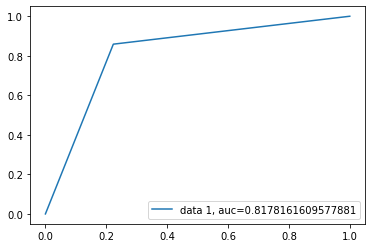

In [92]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LG= model_build(X_train , y_train , X_test , y_test , LogisticRegression())

Confusion matrix:  
 [[1355  375]
 [ 243 1442]]
accuracy_score   :    0.8190336749633967
Precision Score/FPR: 0.7936158503026968
Recall Score/Sensitivity/TPR: 0.8557863501483679
F1 Score: 0.8235294117647058


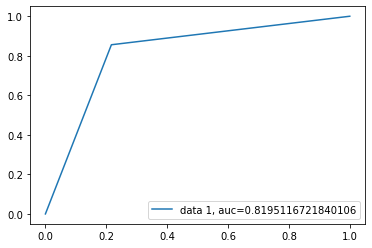

In [93]:
#Linear Support Vector Machine Classifier
from sklearn.svm import SVC
SVC = model_build(X_train , y_train , X_test , y_test , SVC())

Confusion matrix:  
 [[1319  411]
 [ 250 1435]]
accuracy_score   :    0.8064421669106882
Precision Score/FPR: 0.7773564463705309
Recall Score/Sensitivity/TPR: 0.8516320474777448
F1 Score: 0.8128009062588502


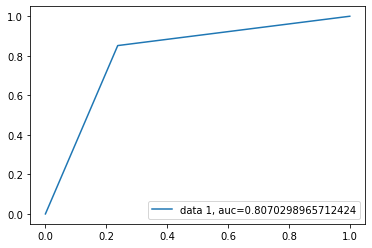

In [73]:
#NonLinear Support Vector Machine Classifier
from sklearn.svm import SVC
SVC = model_build(X_train , y_train , X_test , y_test , SVC(kernel='poly'))

Confusion matrix:  
 [[1386  344]
 [ 299 1386]]
accuracy_score   :    0.8117130307467058
Precision Score/FPR: 0.8011560693641618
Recall Score/Sensitivity/TPR: 0.8225519287833828
F1 Score: 0.8117130307467056


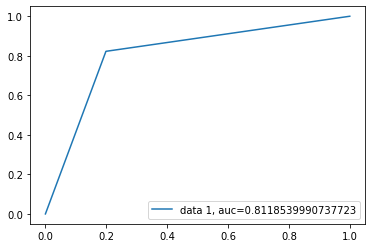

In [74]:
#KNN
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
KNN=KNeighborsClassifier(n_neighbors=9)
knn = model_build(X_train , y_train , X_test , y_test , KNN )

Confusion matrix:  
 [[1437  293]
 [ 309 1376]]
accuracy_score   :    0.8237188872620791
Precision Score/FPR: 0.8244457759137208
Recall Score/Sensitivity/TPR: 0.8166172106824926
F1 Score: 0.8205128205128206


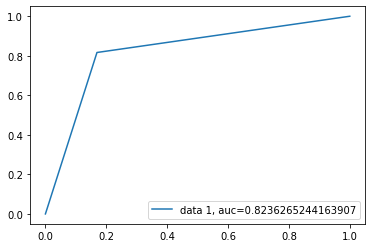

In [76]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier()
rfc = model_build(X_train , y_train , X_test , y_test , RFC )

Confusion matrix:  
 [[1380  350]
 [ 243 1442]]
accuracy_score   :    0.8263543191800878
Precision Score/FPR: 0.8046875
Recall Score/Sensitivity/TPR: 0.8557863501483679
F1 Score: 0.829450675870003


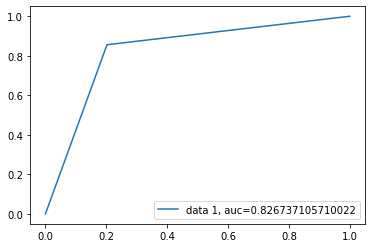

In [77]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier(random_state=1)
gbc = model_build(X_train , y_train , X_test , y_test , GBC )

Confusion matrix:  
 [[1328  402]
 [ 227 1458]]
accuracy_score   :    0.8158125915080527
Precision Score/FPR: 0.7838709677419354
Recall Score/Sensitivity/TPR: 0.8652818991097923
F1 Score: 0.8225669957686883


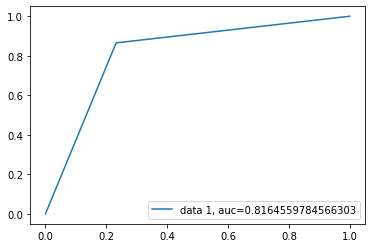

In [78]:
#Ada boost classifier
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc = model_build(X_train , y_train , X_test , y_test , abc )

# Hyperparameter Tuning

In [79]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

param_grid = {

    'bootstrap': [True , False],

    #'max_depth': [80, 100],

    #'min_samples_leaf': [3, 5],

    #'min_samples_split': [10, 12],

    'n_estimators': [100 ,200, 350, 500]

}

# Create a base model

rf = RandomForestClassifier()

# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 

                          cv = 3, n_jobs = -1, verbose = 2)


# Fit the grid search to the data

grid_search.fit(X_train,y_train)

grid_search.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'bootstrap': True, 'n_estimators': 350}

In [80]:
y_pred=grid_search.predict(X_test)
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_pred,y_test)

[[1432  298]
 [ 300 1385]]


0.8248901903367496

In [82]:
## Hyperparameter optimization using RandomizedSearchCV for XgBoost Classifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
        

classifier = xgboost.XGBClassifier()


random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # tim


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[15:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 46.21 seconds.


In [83]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
y_pred=random_search.predict(X_test)
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_test ,y_pred)

[[1392  338]
 [ 245 1440]]


0.8292825768667643